<a href="https://colab.research.google.com/github/JawadZafar1045/easyOCR_text_extraction_from_images_map_titles_through_jaccard_similarty_calculations/blob/main/easy%2Bjaccard.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install easyocr

Recognized Text: TOM
Recognized Text: CLANCY'S
Recognized Text: JACK
Recognized Text: RYAN
Recognized Text: P RIME
Recognized Text: 0 RI G INAL
Recognized Text: NOVEMBER
Recognized Text: MORNING
Recognized Text: prime video


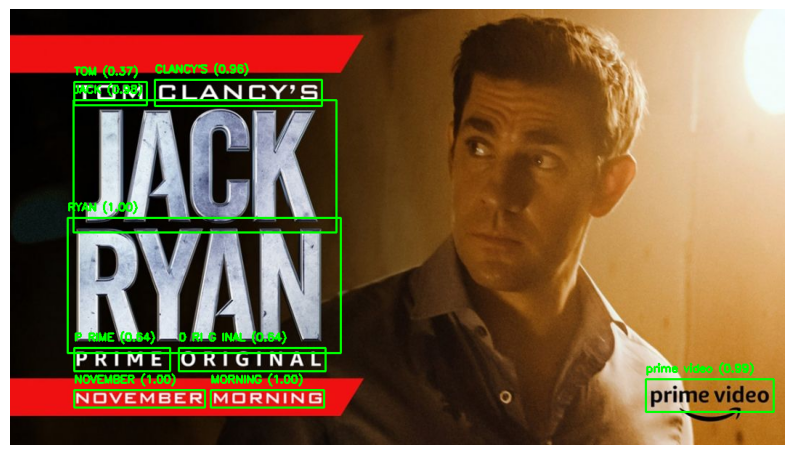

Constructed Title: Tom Clancy's Jack Ryan


In [ ]:
import cv2
import easyocr
import matplotlib.pyplot as plt

def draw_boxes(image_path, result):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for detection in result:
        top_left = tuple(map(int, detection[0][0]))
        bottom_right = tuple(map(int, detection[0][2]))
        text = detection[1]
        confidence = detection[2]
        cv2.rectangle(image_rgb, top_left, bottom_right, (0, 255, 0), 2)
        cv2.putText(image_rgb, f"{text} ({confidence:.2f})", (top_left[0], top_left[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)
        print("Recognized Text:", text)

    plt.figure(figsize=(10, 10))
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()

def load_original_titles():
    original_titles = [
        "Super Mario Bros.",
        "Tom Clancy's Jack Ryan",
        "Tetris",
        "Hall of Fame Football",
        "Grand Theft Auto V",
        "Red Dead Redemption 2",
        "Call of Duty: Modern Warfare",
        "Fortnite",
        "TUTANKHAM",
        "The Witcher 3: Wild Hunt",
        "Counter-Strike: Global Offensive",
        "Sonic the Hedgehog",
        "KETHAR",
        "FIFA 21",
        "Mortal Kombat 11",
        "The Elder Scrolls V: Skyrim",
        "Animal Crossing: New Horizons",
        "Among Us",
        "Garry's Mod",
        "Half-Life 2",
        "Portal",
        "World of Warcraft",
        "League of Legends",
        "Doom",
        "Assassin's Creed Valhalla",
        "Overwatch",
        "PlayerUnknown's Battlegrounds",
        "Fortnite",
        "Resident Evil 2",
        "Batman: Arkham City",
        "God of War",
        "Uncharted 4: A Thief's End",
        "The Last of Us Part II",
        "Final Fantasy VII",
        "Bloodborne",
        "Dark Souls III",
        "Metal Gear Solid V: The Phantom Pain",
        "Persona 5",
        "Halo 3",
        "Mass Effect 2",
        "BioShock",
        "Crash Bandicoot",
        "Street Fighter II",
        "Diablo II",
        "StarCraft",
        "The Sims",
        "Civilization VI",
        "SimCity",
        "Age of Empires II",
        "Command & Conquer: Red Alert",
        "Warcraft III: Reign of Chaos",
        "Star Wars: Knights of the Old Republic",
        "Fallout 4",
        "The Legend of Zelda: Ocarina of Time",
        "Super Metroid",
        "Donkey Kong Country",
        "Chrono Trigger",
        "Final Fantasy VI",
        "EarthBound",
        "Super Smash Bros. Melee",
        "GoldenEye 007",
        "Super Mario 64",
        "Mario Kart 8 Deluxe",
        "The Legend of Zelda: Breath of the Wild",
        "Pac-Man",
        "Space Invaders",
        "Street Fighter II",
        "Final Fantasy VII",
        "Planet of Death",
        "Space Force",
        "Call of Duty: Modern Warfare",
        "Grand Theft Auto V",
        "Red Dead Redemption 2",
        "Tumblestone",
        "UFC2",
        "Animal Crossing: New Horizons",
        "FIFA 21",
        "Overwatch",
        "Counter-Strike: Global Offensive",
        "Pokemon Red and Blue",
        "The Last of Us Remastered",
        "The Witcher 3: Wild Hunt",
        "Assassin's Creed Valhalla",
        "Mortal Kombat 11",
        "The Elder Scrolls V: Skyrim",
        "The Martian",
        "Batman: Arkham City",
        "Uncharted 4: A Thief's End",
        "The Last of Us Part II",
        "Dark Souls III",
        "Bloodborne",
        "Persona 5",
        "Resident Evil biohazard",
        "Half-Life 2",
        "Portal",
        "Resident Evil 2",
        "Crash Bandicoot",
        "BioShock",
        "Mass Effect 2",
        "StarCraft",
        "The Sims",
        "Age of Empires II",
        "Civilization VI",
        "SimCity",
        "Fallout 4",
        "Command & Conquer: Red Alert",
        "Warcraft III: Reign of Chaos",
        "Amidar",
        "Super Mario 64",
        "Mario Kart 8 Deluxe",
        "The Legend of Zelda: Breath of the Wild",
        "Pac-Man",
        "Space Invaders"
    ]

    return original_titles

def extract_text_from_image(image_path):
    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)
    extracted_text = [text[1] for text in result]  # Extracted text from OCR
    return extracted_text

# Calculate Jaccard similarity
def calculate_jaccard_similarity(extracted_text, original_title):
    max_similarity = 0.0
    for text in extracted_text:
        extracted_tokens = set(text.lower().split())
        original_tokens = set(original_title.lower().split())
        intersection = len(extracted_tokens.intersection(original_tokens))
        union = len(extracted_tokens.union(original_tokens))
        if union == 0:
            continue
        similarity_score = intersection / union
        max_similarity = max(max_similarity, similarity_score)
    return max_similarity

def construct_title(extracted_text, original_titles):
    best_match = ""
    max_similarity = 0
    for title in original_titles:
        similarity = calculate_jaccard_similarity(extracted_text, title)
        if similarity > max_similarity:
            max_similarity = similarity
            best_match = title
    return best_match

def main():

    original_titles = load_original_titles()
    image_path = "/content/drive/My Drive/images_games/sample6.jpg"
    extracted_text = extract_text_from_image(image_path)

    reader = easyocr.Reader(['en'])
    result = reader.readtext(image_path)
    draw_boxes(image_path, result)

    constructed_title = construct_title(extracted_text, original_titles)
    print("Constructed Title:", constructed_title)

if __name__ == "__main__":
    main()

